In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

#' each row is an observation, each column is a feature
print(iris.feature_names)
print(iris.target)
print(iris.target_names)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [3]:
#' in scikit-learn features and response are separate objects
#' lets store feature matrix in X 
#' lets store response vector in y

X = iris.data
y = iris.target

print(X.shape)
print(y.shape)


(150, 4)
(150,)


In [4]:
#' scikit-learn is organised into modules, to make it easy to find classes.
import sklearn
dir(sklearn)

#' scikit-learn has a 4 steps to modeling
#' 1: import the class you want to use.
#' 2: instantiate the class. Here you can specify tuning parameters.
#' 3: fit / train the model
#' 4: predict response for a new observation.

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X,y)
print(knn.predict([[3,5,4,2]]))
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
print(knn.predict(X_new))

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X,y)
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
print(knn.predict(X_new))

[2]
[2 1]
[1 1]


In [5]:
#' did the model work well?
#' can't  tell with 'out of sample' observations

#' lets examine our training accuracy, ie. the proportion of correct predictions (an evaluation metric for classification problems)
#' lets also compare training accuracy using different values of K.

from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X,y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y,y_pred))

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X,y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y,y_pred))

0.9666666666666667
1.0


In [9]:
#' Our goal is to estimate the likely performance of our model on out-of-sample-data.
#' maximizing training accuracy rewards overfitting the model to the date and the model may not generalize.
#' ie. the model may learn the noise more than the signal.
#' the recommedation is to train-test-split the data...

print(X.shape)
print(y.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 4)
(150,)
(90, 4)
(60, 4)
(90,)
(60,)


In [10]:
#' testing accuracy is a better estimate for out-of-sample-performance then training accuracy!
#' lets repeat what we did previously using our train-test-split.

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667
0.95


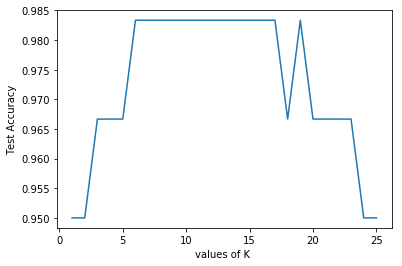

In [11]:
#' how can we find a better value for K?
#' lets iterate through a list of K values, and plot test accuracys for each value of K.
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

import matplotlib.pyplot as plt
plt.plot(k_range, scores)
plt.xlabel('values of K ')
plt.ylabel('Test Accuracy')
plt.show()

In [12]:
#' once model is chosen, and optimal parameters set, and ready to make predictions using out-of-sample-data
#'remember to retrain the model using all the data. otherwise will be throwing away valuable training data

knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X, y) # using all the dataschool
print(knn.predict([[3, 5, 4, 2]])) # an out-of-sample observation

[1]


In [13]:
#' # downsides of train-test-split:
#' high variance of out-of-sample accuracy!! accuracy changes a lot depending on what happened to be in the training set.
#' you can use k-fold cross validation instead of train-test-split to overcome this.

#' lets look at advertising data using pandas!!
import pandas as pd

data = pd.read_csv("http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv", index_col = 0)
print(data.head())
print(data.tail())
print(data.shape)

      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9
        TV  radio  newspaper  sales
196   38.2    3.7       13.8    7.6
197   94.2    4.9        8.1    9.7
198  177.0    9.3        6.4   12.8
199  283.6   42.0       66.2   25.5
200  232.1    8.6        8.7   13.4
(200, 4)


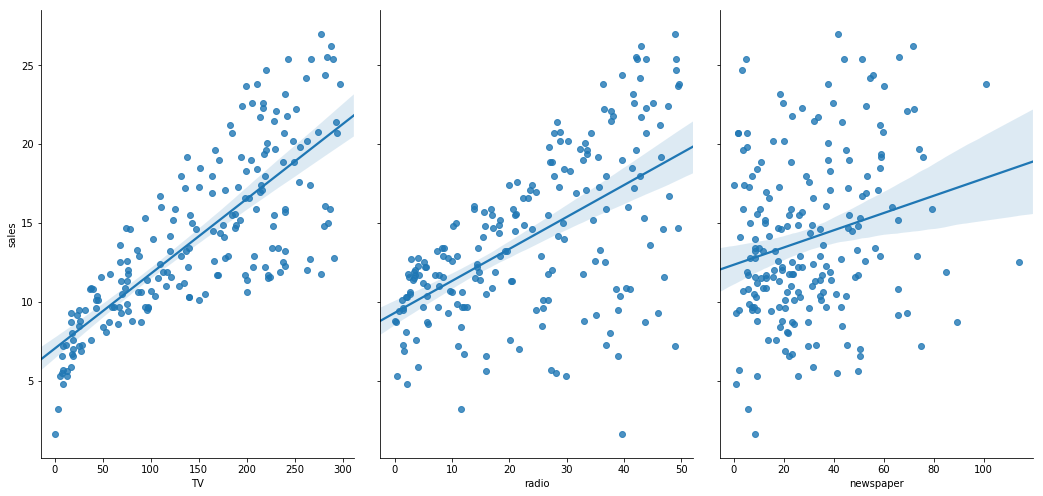

In [14]:
#' lets use seaborn to visualise the relationships between features and response, pairplots is good for this.
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data, x_vars = ["TV", "radio", "newspaper"], y_vars = "sales", height = 7, aspect = 0.7, kind = "reg")
plt.show()

In [15]:
#' we want to predict sales based on advertising hours, this is a regression problem.
feature_cols = ["TV", "radio", "newspaper"]
X = data[feature_cols] # subset original dataframe
print(X.head)
print(X.shape)
print(type(X))

y = data["sales"] # data.sales also works
print(y.head)
print(y.shape)
print(type(y))

<bound method NDFrame.head of         TV  radio  newspaper
1    230.1   37.8       69.2
2     44.5   39.3       45.1
3     17.2   45.9       69.3
4    151.5   41.3       58.5
5    180.8   10.8       58.4
6      8.7   48.9       75.0
7     57.5   32.8       23.5
8    120.2   19.6       11.6
9      8.6    2.1        1.0
10   199.8    2.6       21.2
11    66.1    5.8       24.2
12   214.7   24.0        4.0
13    23.8   35.1       65.9
14    97.5    7.6        7.2
15   204.1   32.9       46.0
16   195.4   47.7       52.9
17    67.8   36.6      114.0
18   281.4   39.6       55.8
19    69.2   20.5       18.3
20   147.3   23.9       19.1
21   218.4   27.7       53.4
22   237.4    5.1       23.5
23    13.2   15.9       49.6
24   228.3   16.9       26.2
25    62.3   12.6       18.3
26   262.9    3.5       19.5
27   142.9   29.3       12.6
28   240.1   16.7       22.9
29   248.8   27.1       22.9
30    70.6   16.0       40.8
..     ...    ...        ...
171   50.0   11.6       18.4
172  164.5   

In [16]:
#' split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape) 
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#' default split is 75% for training and 25% for testing

(150, 3)
(150,)
(50, 3)
(50,)


In [17]:
#' Although we'll be using a new class, we follow the same framework for generating our model
#' 1: import the class you want to use.
#' 2: instantiate the class. Here you can specify tuning parameters.
#' 3: fit / train the model
#' 4: predict response for a new observation.

from sklearn.linear_model import LinearRegression

#' instantiate
linreg = LinearRegression()
linreg.fit(X_train, y_train) # learn the coefficients
print(linreg.intercept_) # print the intercept and coefficients
print(linreg.coef_)
print(list(zip(feature_cols, linreg.coef_))) # can pair the feature names with the coefficients

#' making predictions with linear model
y_pred = linreg.predict(X_test)
print(y_pred)

2.87696662231793
[0.04656457 0.17915812 0.00345046]
[('TV', 0.04656456787415029), ('radio', 0.1791581224508884), ('newspaper', 0.0034504647111804343)]
[21.70910292 16.41055243  7.60955058 17.80769552 18.6146359  23.83573998
 16.32488681 13.43225536  9.17173403 17.333853   14.44479482  9.83511973
 17.18797614 16.73086831 15.05529391 15.61434433 12.42541574 17.17716376
 11.08827566 18.00537501  9.28438889 12.98458458  8.79950614 10.42382499
 11.3846456  14.98082512  9.78853268 19.39643187 18.18099936 17.12807566
 21.54670213 14.69809481 16.24641438 12.32114579 19.92422501 15.32498602
 13.88726522 10.03162255 20.93105915  7.44936831  3.64695761  7.22020178
  5.9962782  18.43381853  8.39408045 14.08371047 15.02195699 20.35836418
 20.57036347 19.60636679]


In [18]:
#' we need some evaluation metric to compare our predictions with the actual values. can't use accuracy like in the classification problem before!

#' Mean Absolute Error (MAE)
#' it is the mean of the absolute value of the errors
#' error is the difference between the true and predicted values
#' a short example below:
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]
print((10 + 0 + 20 + 10)/4.) # calculate MAE by hand

from sklearn import metrics # calculate MAE using scikit-learn
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


In [19]:

#' MSE: mean squared error
print((10**2 + 0**2 + 20**2 + 10**2)/4.) # calculate MSE by hand
print(metrics.mean_squared_error(true, pred))
#' MSE is a bit harder to interpret than MAE

150.0
150.0


In [20]:
#' RMSE: root mean squared error
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.)) # by hand
print(np.sqrt(metrics.mean_squared_error(true, pred)))
#' notice RMSE is a bit larger than MAE, squaring of errors increases the weight of larger errors

12.24744871391589
12.24744871391589


In [21]:
#' The bottom line
#' MAE: easiest to understand, it's an average error
#' MSE: more popular than MAE, it punishes larger errors
#' RMSE: more popular than MSE, it is interpretable in the "y" units


In [22]:
#' compute RMSE for sales prediction
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#' value of 1.4 is p.gud as sales ranged from 5 to 25

1.4046514230328953


In [23]:
#' linear reg has no tuning parameters for us to tune.
# can use train_test_split to look at individual features
# lets remove newspapers, as it showed week correlation on visualisation
feature_cols = ['TV', 'radio']
X = data[feature_cols]
y = data.sales
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# RMSE reduces (error is what we want to minimize)
#' it is unlikely this feature is useful for predicting sales and should be removed from the model

1.3879034699382888


In [ ]:




#' purpose of model evaluation is to choose the best model: goal is estimate the likely performance of a model on out-of-sample data
#' remember: downside of tran-test-split; high variance estimate of the out-of-sample testing accuracy

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# read in the iris data
iris = load_iris()

X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

#' lets check classification accuracy of KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

#' there's a difference in test set accuracy!
#' testing accuracy is a high variance estimate like we said
#' we can reduce this variance using cross validation

#' k-fold cross-validation:
#' split data into K folds
#' use 1 fold as testing and remainder as training
#' calculate test accuracy
#' repeat K times with different folds!
#' use average test accuracy as the estimate of out-of-sample accuracy

#' simulation of splitting a dataset of 25 observations into 5 folds using KFold!
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=False).split(range(25))

#' print the contents of each training and testing set from simulation
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))

# disadvantages of k cross-validation, difficult to inspect results with confusion matrix or ROC curve
# these are easy to examine with train test split
# recommendations: K=10, for classification problems, stratified sampling  is recommended for creating the folds, each response class should be represented with equal proportions in each of the K folds, "cross-val-score" does this by default

from sklearn.model_selection import cross_val_score
#' 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)
#' use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

#' search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

import matplotlib.pyplot as plt
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# grid_search_cv can do all the above for us!
# k=13 to k=20 seems to work well for KNN, advised to choose simplest model. in KNN higher values of K produce simpler models, as such K=20 would be best.

# lets use cross validation to choose between models!
# 10-fold cross-validation with the best KNN model (after model tuning)
knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())
# 10-fold cross-validation with logistic regression (no tuning required)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

# now, lets use cross-validation for feature selection
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
data = pd.read_csv("http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv", index_col=0)
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
y = data.sales

# 10-fold cross-validation with all three features
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')
mse_scores = -scores # fix sign MSE scores as cross_val_score negates it
rmse_scores = np.sqrt(mse_scores) # convert from MSE to RMSE
print(rmse_scores)
print(rmse_scores.mean()) # calculate the average RMSE

# 10-fold cross-validation with two features (excluding Newspaper)
feature_cols = ['TV', 'radio']
X = data[feature_cols]
print(np.sqrt(-cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')).mean())
# results in lower score, which we are trying to minimize, yay!

#' now, lets learn how to use grid search to select the optimal tuning parameters
#' use grid_search_cv for finding optimal K for knn
from sklearn.model_selection import GridSearchCV
#' define the parameter values that should be searched
X = iris.data
y = iris.target
k_range = list(range(1, 31))
print(k_range)
#' create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print(param_grid)
#' instantiate the grid, with our options
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)

#' fit the grid with data, 10 fold cross val is being run 30X times, therofore model is being fit and predictions made 300 times
grid.fit(X, y)
#' view the results as a pandas DataFrame
import matplotlib.pyplot as plt
import pandas as pd
print(pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']])
print(grid.cv_results_)

#' examine the first result
print(grid.cv_results_['params'][0])
print(grid.cv_results_['mean_test_score'][0])
#' print the array of mean scores only
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)
#' plot the results
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()
#' examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

#' can use param_grid to map multiple parameters at the same time!!
#' define the parameter values that should be searched
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
#' create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)
#' instantiate and fit the grid, this is known as as exhaustive search as all parameters checked
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X, y)
#' view the results
print(pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']])
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

#' we have successfully tuned our parameters!
#' now lets retrain our model with the best parameters on all the data.
#' GridSearchCV automatically refits best model using all of the data, accessable with .predict
print(grid.predict([[3, 5, 4, 2]]))

#' It can get computationally intensive to perform an exhaustiv tune.
#' RandomizedGridCV solves this
#' it searches only a random subset of the provided parameters. can effectively decide how long you want it to run for
#' with RandomizedGridCV you provide a parameter distribution rather than a grid. lets do that.

from sklearn.model_selection import RandomizedSearchCV
param_dist = dict(n_neighbors=k_range, weights=weight_options)
#' n_iter controls the number of searches
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5, return_train_score=False)
rand.fit(X, y)
print(pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']])
print(rand.best_score_)
print(rand.best_params_)
#' run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
#' most of the time it's able to find the best if not closest to the best

best_scores = []
for _ in range(20):
    rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, return_train_score=False)
    rand.fit(X, y)
    best_scores.append(round(rand.best_score_, 3))
print(best_scores)


#' lets explore a classification problem more in depth using a diabetes dataset.
#' the original dataset was used to predict diabetes based on diagnostic measurements, using data collected from pima native americans.
import pandas as pd
path = 'https://raw.githubusercontent.com/benjaminsuarez/sklearn_workshop/master/diabetes.csv'
pima = pd.read_csv(path)

#' lets try to predict the diabetes status of a patient given their health measurements

#' define X and y
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age']
X = pima[feature_cols]
y = pima.Outcome
#' split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
#' train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#' make class predictions for the testing set
y_pred_class = logreg.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

#' beware: whenever using classification accuracy as evaluation metric, need to compare it to its null accuracy, which is the accuracy that could be achieved by always predicting the most frequent class in the testing set.
#' null accuracy says, if I model were to predict the most dominant all the time, how often would it be correct

#' null accuracy calculation:
#' examine the class distribution of the testing set (using a Pandas Series method)
print(y_test.value_counts()) # this is known as the class distribution
print(y_test.mean()) # calculate the percentage of ones
print(1 - y_test.mean()) # calculate the percentage of zeros
print(max(y_test.mean(), 1 - y_test.mean())) # calculate null accuracy (for binary classification problems coded as 0/1)
#' calculate null accuracy (for multi-class classification problems)
print(y_test.value_counts().head(1) / len(y_test) )

#' this highlights one weaknes of test accurracy as a model evaluation metric. It doesn't tell us anything about the underlying distribution of the testing set.

#' another weakness, when true is a zero, model almost always predicts zero, but when true value is one, model rarely predicts a one. it makes certain types of errors, but not others.
#' ie. it doesn't tell you what type of errors it makes
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])
#' this issue is remedied through the use of a confusion matrix

#' confusion matrix:
#' NB! first argument: true values, second argument: predicted values
print(metrics.confusion_matrix(y_test, y_pred_class))

#' True Positives (TP): we correctly predicted  they do have diabetes
#' True Negatives (TN): we correctly predicted  they don't have diabetes
#' False Positives (FP): we incorrectly predicted  they do have diabetes (a "Type I error")
#' False Negatives (FN): we incorrectly predicted  they don't have diabetes (a "Type II error")

#' note, confusion matrix is not an evaluation metric so cannot be used to choose model.
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

#' popular mertrics computed from a confusion matrix below
#' classification accuracy:
#' note need one number as float for true devision,vs. integer division.
#' accuracy_score method does the exact same thing
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))
#' classification error: aka misclassification rate
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))
#' sensitivity:when actual value is positive, how often is prediction correct, aka recall_score
print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))
#' specificity: when actual value is neg, how often is the prediction correct. want to maximize this
print(TN / float(TN + FP))
#' false positive rate:
print(FP / float(TN + FP))
#' precision: when a positive value is predicted, how often is the prediction correct?
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, y_pred_class))

#' Confusion matrix gives you a more complete picture of how your classifier is performing
#' Also allows you to compute various classification metrics, and these metrics can guide your model selection

#' we can adjust classification thresholds
print(logreg.predict(X_test)[0:10]) # first 10 predicted responses
#' print the first 10 predicted probabilities of class membership, row=observations, cols=class 0,1
#' can be used to rank observations by predicted prob of diabetes and prioritize patient outreach.
print(logreg.predict_proba(X_test)[0:10, :])
#' print the first 10 predicted probabilities for class 1
print(logreg.predict_proba(X_test)[0:10, 1])
#' store the predicted probabilities for class 1, using all data
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
import matplotlib.pyplot as plt
#' histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')
plt.show()

#' note prediction threshold is set to 0.5, can adjust sensitivity and specificity by adjusting this
#' predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]
print(y_pred_prob[0:10]) # first 10 predicted probabilities
print(y_pred_class[0:10]) # first 10 predicted classes with the lower threshold
print(confusion) # previous confusion matrix (default threshold of 0.5)
print(metrics.confusion_matrix(y_test, y_pred_class)) # threshold of 0.3
print(46 / float(46 + 16))# sensitivity has increased (used to be 0.24)
print(80 / float(80 + 50)) # specificity has decreased (used to be 0.91)

#' note, threshold adjustment is the last step you take in model building process
#' majority of time should be spent selecting better models and choosing the best model
#' can use ROC curve to see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold.

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()
#' graph tells us, if you choose sensitivity of 0.9, must accept specificity of 0.6

#' lets define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])
evaluate_threshold(0.5)
evaluate_threshold(0.3)

#' AUC is % of the ROC plot under the curve
#' AUC is useful as a single number summary of classifier performance.
#' higher AUC is indicative of a better classifier, can be used as alternative to classification accuracy
print(metrics.roc_auc_score(y_test, y_pred_prob))
#' If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a higher predicted probability to the positive observation.
#' AUC is useful even when there is high class imbalance (unlike classification accuracy).
#' in this scenario, AUC would be a useful evaluation metric, whereas classification accuracy, would not.
#' calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
print(cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean())
#' main advantage of ROC and AUC, don't require you to choose classification threshold unlike confusion matrix. however, they are less interpretable than confusion matrix, for multiclass problems
